# Calculation Code:

### Analysis of `Determination of atmospheric extinction for different colors` experiment 
Exp Date : 26th Feb, 23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from LocalModule.Curve_Fit import Linear_Fit

In [2]:
df = pd.read_excel('Arcturus.xlsx')
df

,Time,Hour Angle,B_flux,B_error,V_flux,V_error,Back_B,Back_V,B_net,V_net
0,12:53:00,20:23:22,182,5,670,20,2,2,180,668
1,01:23:00,20:53:25,217,7,730,20,1,2,216,728
2,01:38:00,21:08:27,233,7,768,20,2,2,231,766
3,01:53:00,21:23:29,245,10,800,30,3,2,242,798
4,02:08:00,21:38:21,250,5,815,20,2,1,248,814
5,02:23:00,21:53:34,252,5,825,15,2,2,250,823
6,02:38:00,22:08:36,262,5,845,15,1,2,261,843
7,02:53:00,22:23:38,272,6,870,15,2,2,270,868
8,03:08:00,22:38:40,276,4,882,15,1,2,275,880
9,03:23:00,22:53:42,282,10,885,15,2,2,280,883


In [3]:
Exp_date = '26th Feb, 23'
star = 'Arcturus'
Dec = 19 + 3/60 + 28/3600
Lat = 18.559
t_expo = 1

HA = np.array([])

for i in df['Hour Angle']:
    if i.hour <= 12:
        h = i.hour + i.minute/60 + i.second/3600
    else:
        h = 24 - (i.hour + i.minute/60 + i.second/3600)
    HA = np.append(HA, h * 15)

# converting values to radian

Dec = Dec * np.pi/180
Lat = Lat * np.pi/180
HA = HA * np.pi/180

Z_angle = np.arccos(np.sin(Lat) * np.sin(Dec) + np.cos(Lat) * np.cos(Dec) * np.cos(HA))
Z_angle*180/np.pi

array([51.05328386, 44.02306503, 40.4966592 , 36.96492761, 33.46772451,
       29.88402168, 26.33992648, 22.7928424 , 19.24334147, 15.69206203,
       12.13984121,  8.5842301 ,  5.03759289,  1.53848599,  2.16058324])

In [4]:
def Flux2Mag(flux):
    m = -2.5 * np.log10(flux)
    return m

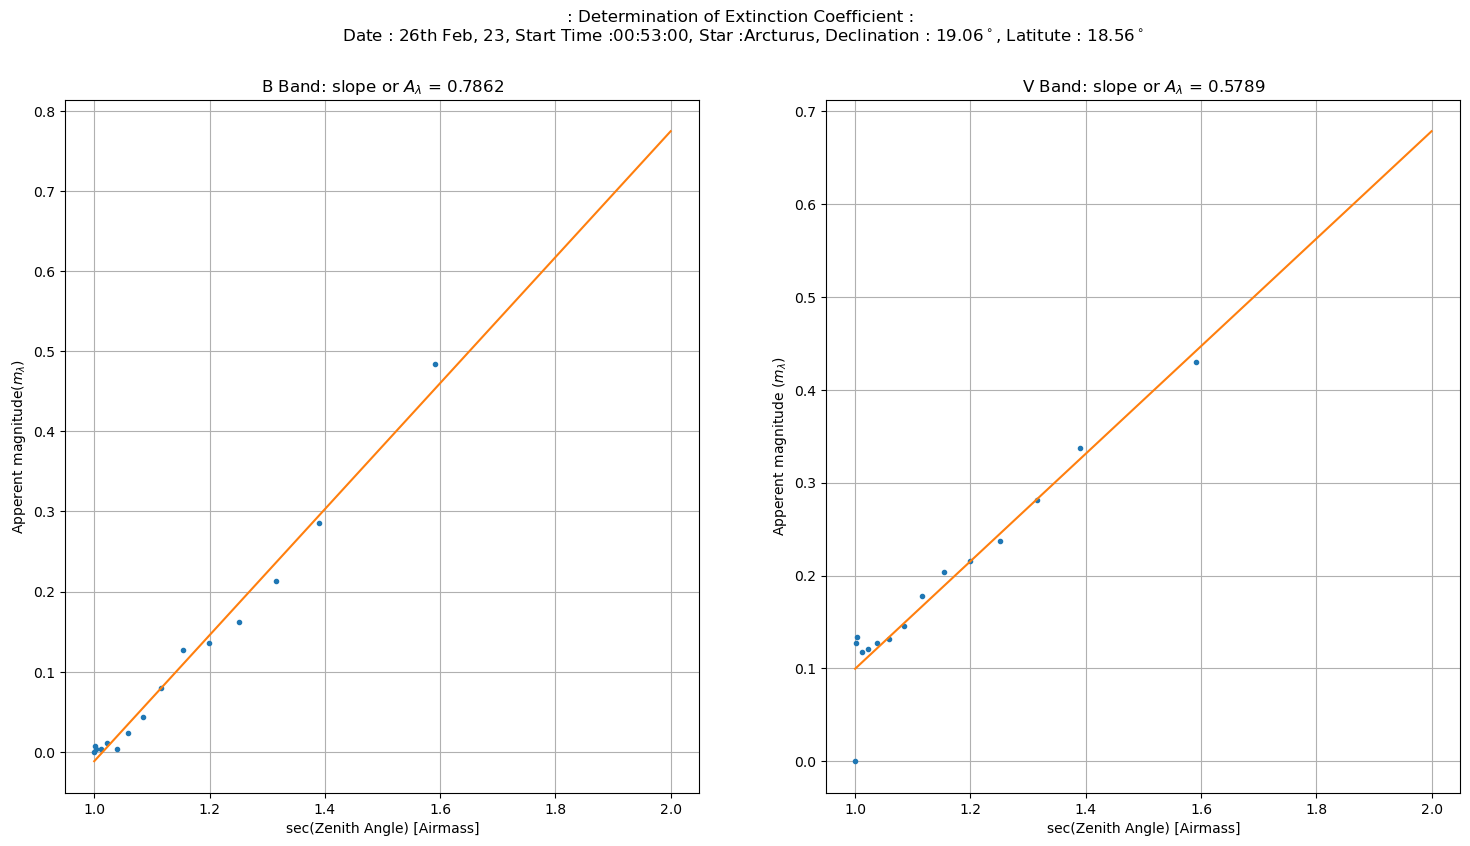

In [5]:
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sec_th = 1/ np.cos(Z_angle)

M_b = Flux2Mag(df['B_net'])
M_v = Flux2Mag(df['V_net'])
m_inst_b = Flux2Mag(np.max(df['B_net'].values))
m_inst_v = Flux2Mag(np.max(df['V_net'].values))


M_b = M_b - m_inst_b
M_v = M_v - m_inst_v

mb, cb = Linear_Fit(sec_th, M_b)
mv, cv = Linear_Fit(sec_th, M_v)

xx = np.linspace(1, 2, 100)
fb = mb*xx + cb
fv = mv*xx + cv

plt.suptitle(': Determination of Extinction Coefficient :\n Date : {}, Start Time :{}, Star :{}, Declination : {:.2f}$^\\circ$, Latitute : {:.2f}$^\\circ$'.format(Exp_date, '00:53:00', star, np.degrees(Dec), np.degrees(Lat)))

ax1.plot(sec_th, M_b, '.')
ax1.plot(xx, fb)
ax1.set_title('B Band: slope or $A_\lambda$ = {:.4f}'.format(mb))
ax1.set_xlabel('sec(Zenith Angle) [Airmass]')
ax1.set_ylabel('Apperent magnitude($m_\lambda$)')
ax1.grid()

ax2.plot(sec_th, M_v, '.')
ax2.plot(xx, fv)
ax2.set_title('V Band: slope or $A_\lambda$ = {:.4f}'.format(mv))
ax2.set_xlabel('sec(Zenith Angle) [Airmass]')
ax2.set_ylabel('Apperent magnitude ($m_\lambda$)')
ax2.grid()

plt.savefig('Atmos_extinction_arcturus.png')

In [6]:
calc_df = {'Zenith Angle (Degrees)': Z_angle * 180/np.pi, 'Magnitude in B Band' : M_b.values, 'Magnitude in V Band': M_v.values}
calc_df = pd.DataFrame(calc_df)
calc_df

,Zenith Angle (Degrees),Magnitude in B Band,Magnitude in V Band
0,51.053284,0.483585,0.430432
1,44.023065,0.285631,0.337045
2,40.496659,0.212736,0.281801
3,36.964928,0.162227,0.237366
4,33.467725,0.135637,0.215812
5,29.884022,0.126916,0.203874
6,26.339926,0.080165,0.177804
7,22.792842,0.043356,0.146074
8,19.243341,0.023434,0.131166
9,15.692062,0.003871,0.127471
